In [49]:
import numpy as np
from math import tanh

In [2]:
input_size=2
layers=[4,3]
output_size=2


In [3]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [4]:
a=np.array([[10,10],[20,20]])
a_=softmax(a)
print(a_)

[[0.5 0.5]
 [0.5 0.5]]


In [171]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={}
        model['w1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        model['w2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        model['w3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        self.model=model
    
        
    def forword(self,x):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        z3=np.dot(a2,w3)+b3
        y_=softmax(z3)
        self.activation_outputs=(a1,a2,y_)
        return y_
    def backword(self,x,y,lr=0.001):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_=self.activation_outputs
        delta3=y_-y
        m=x.shape[0]
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        self.model['w1']-=lr*dw1
        self.model['b1']-=lr*db1
        self.model['w2']-=lr*dw2
        self.model['b2']-=lr*db2
        self.model['w3']-=lr*dw3
        self.model['b3']-=lr*db3
    def predict(self,x):
        y_out=self.forword(x)
        return np.argmax(y_out,axis=1)
    def summary(self):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_=self.activation_outputs
        print(w3.shape[0])
        print(y_.shape[0])
        
    

In [172]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l


In [173]:
def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht


In [174]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [175]:
x,y=make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)

In [176]:
plt.style.use('seaborn')

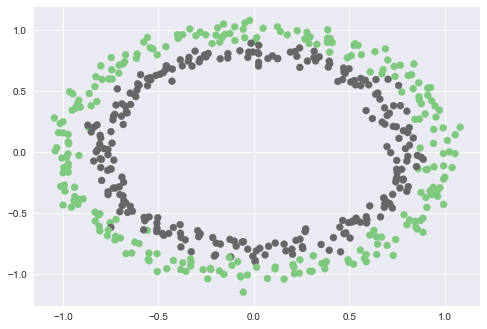

In [177]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [178]:
model=NeuralNetwork(input_size=2,layers=[10,7],output_size=2)

In [179]:
model

In [180]:
print(y)

[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

In [181]:
model.forword(x)

array([[0.91403153, 0.08596847],
       [0.99421276, 0.00578724],
       [0.90912041, 0.09087959],
       [0.99225179, 0.00774821],
       [0.00734706, 0.99265294],
       [0.02621273, 0.97378727],
       [0.96177352, 0.03822648],
       [0.83050364, 0.16949636],
       [0.1135999 , 0.8864001 ],
       [0.99584056, 0.00415944],
       [0.99026376, 0.00973624],
       [0.09600648, 0.90399352],
       [0.96305418, 0.03694582],
       [0.98956189, 0.01043811],
       [0.91661585, 0.08338415],
       [0.04626484, 0.95373516],
       [0.05282042, 0.94717958],
       [0.85497448, 0.14502552],
       [0.33394742, 0.66605258],
       [0.27091682, 0.72908318],
       [0.88329707, 0.11670293],
       [0.93518543, 0.06481457],
       [0.96130634, 0.03869366],
       [0.02637322, 0.97362678],
       [0.98399751, 0.01600249],
       [0.69903198, 0.30096802],
       [0.83554952, 0.16445048],
       [0.99378307, 0.00621693],
       [0.08449236, 0.91550764],
       [0.00435075, 0.99564925],
       [0.

In [182]:
y_oht=one_hot(y,2)

In [183]:
y_oht

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [184]:
model.summary()

7
500


In [194]:
def train(x,y,model,epoch,lr=0.001,logs=True):
    training_loss=[]
    classes=2
    y_oht=one_hot(y,classes)
    for ix in range(epoch):
        y_=model.forword(x)
        l=loss(y_oht,y_)
        training_loss.append(l)
        model.backword(x,y_oht,lr)
        if logs:
            print("epoch %d loss %.4f",ix)
    return training_loss

In [195]:
loss=train(x,y,model,500)

TypeError: 'list' object is not callable

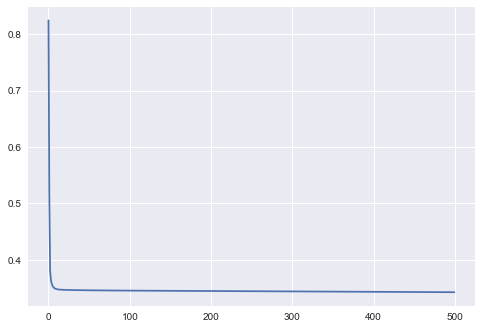

In [187]:
plt.plot(loss)
plt.show()

In [188]:
print(loss)

[0.8245556100835444, 0.5159069210230613, 0.3799219602561076, 0.36370918806092767, 0.35737253756124937, 0.35358918325948013, 0.3512299347517577, 0.3497312900232955, 0.3487571976299549, 0.3481060953146878, 0.347658281518596, 0.3473410191074464, 0.3471095751941591, 0.3469357046027401, 0.34680127266625, 0.3466943622516517, 0.3466070113891491, 0.34653379805703266, 0.34647097583833036, 0.34641591670032224, 0.34636675465962913, 0.3463221487938435, 0.34628112552165724, 0.34624297067765064, 0.3462071553379731, 0.34617328385763185, 0.34614105727915795, 0.3461102472309054, 0.34608067721827773, 0.3460522090958474, 0.3460247332445205, 0.3459981613943106, 0.34597242136036715, 0.34594745316330044, 0.34592320615928274, 0.34589963690778824, 0.3458767075811716, 0.34585438477303193, 0.3458326386012969, 0.34581144202962294, 0.3457907703510859, 0.3457706007928392, 0.34575091221125037, 0.34573168485492684, 0.3457129001788746, 0.34569454069731864, 0.3456765898658865, 0.3456590319862, 0.3456418521276628, 0.34

In [189]:
outputs=model.predict(x)

In [190]:
outputs==y

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
       False,  True,

In [191]:
acc=np.sum(outputs==y)/y.shape[0]

In [192]:
acc

0.598